In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [12]:
raw_data = pd.read_csv('Cat_Regressions.csv')
raw_data

,SCORE,CGPA,Attendance(>=75%)
0,350,4.9,Yes
1,298,4.6,Yes
2,345,4.8,Yes
3,234,4.7,Yes
4,343,4.3,No
5,234,4.1,No
6,267,4.4,Yes
7,279,4.3,Yes
8,305,4.5,No
9,307,4.5,Yes


In [15]:
##When dealing with categorical data make sure to create a dummy variable using the map function.

new_data = raw_data.copy()

new_data['Attendance(>=75%)'] = new_data['Attendance(>=75%)'].map({"Yes":1 , "No": 0})

new_data

,SCORE,CGPA,Attendance(>=75%)
0,350,4.9,1
1,298,4.6,1
2,345,4.8,1
3,234,4.7,1
4,343,4.3,0
5,234,4.1,0
6,267,4.4,1
7,279,4.3,1
8,305,4.5,0
9,307,4.5,1


In [16]:
new_data.describe()

,SCORE,CGPA,Attendance(>=75%)
count,24.000000,24.000000,24.000000
mean,282.208333,4.341667,0.625000
std,47.524803,0.601387,0.494535
min,198.000000,2.300000,0.000000
25%,246.000000,4.175000,0.000000
50%,289.000000,4.500000,1.000000
75%,321.250000,4.700000,1.000000
max,350.000000,5.000000,1.000000


In [18]:
y = new_data['CGPA']
x1 = new_data[['SCORE', 'Attendance(>=75%)']]

In [20]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CGPA   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     22.51
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           5.98e-06
Time:                        13:50:21   Log-Likelihood:                -7.5943
No. Observations:                  24   AIC:                             21.19
Df Residuals:                      21   BIC:                             24.72
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.0185      0.449      4.499      0.000       1.085       2.952
SCORE                 0.0070      0.002      4.244      0.000       0.004       0.010
Attendance(>=75%)     0.5564      0.158      3.511      0.002       0.227       0.886
==============================================================================
Omnibus:                       13.887   Durbin-Watson:                   2.178
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.386
Skew:                          -1.237   Prob(JB):                     0.000456
Kurtosis:                       6.044   Cond. No.                     1.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

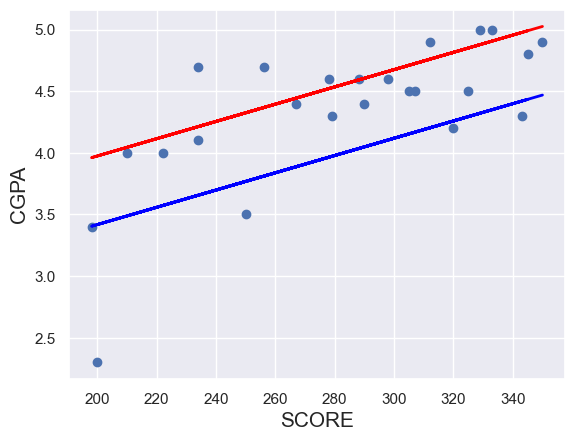

In [25]:
plt.scatter(data['SCORE'],y)
yhat_no = 2.0185 + 0.0070*data['SCORE']
yhat_yes = 2.0185 + 0.5564 + 0.0070*data['SCORE']
fig = plt.plot(data['SCORE'],yhat_no,lw = 2, c = "blue")
fig = plt.plot(data['SCORE'],yhat_yes,lw = 2, c = "red")
plt.xlabel('SCORE', fontsize = 15)
plt.ylabel('CGPA', fontsize = 15)
plt.show()

In [27]:
x

,const,SCORE,Attendance(>=75%)
0,1.0,350,1
1,1.0,298,1
2,1.0,345,1
3,1.0,234,1
4,1.0,343,0
5,1.0,234,0
6,1.0,267,1
7,1.0,279,1
8,1.0,305,0
9,1.0,307,1


In [34]:
data = pd.DataFrame({'const':1 ,'SCORE':[340,280],'Attendance':[1,1]})
data = data[['const', 'SCORE','Attendance']]
data

,const,SCORE,Attendance
0,1,340,1
1,1,280,1


In [35]:
data.rename(index={0: "Bob", 1 :"Skiman"})

,const,SCORE,Attendance
Bob,1,340,1
Skiman,1,280,1


In [36]:
predictions = results.predict(data)
predictions

0    4.954849
1    4.534872
dtype: float64

In [40]:
pred = pd.DataFrame({'Predictions': predictions})
joiner = data.join(pred)
joiner.rename({0: 'Bob' ,1: 'Skiman'})

,const,SCORE,Attendance,Predictions
Bob,1,340,1,4.954849
Skiman,1,280,1,4.534872


In [6]:
import os
os.getcwd()

'C:\\Users\\HP\\Documents\\Regression Model'

In [5]:
os.chdir('C:\\Users\\HP\\Documents\\Regression Model')